# A Brief Analysis Of Car Accidents Happening In US From 2016 to 2021
# Author: Jiawei Zhang
# 1.Introduction
 According to the study by Hedges Company [1], by December 2021 there was a total of 289.5 million registered cars in the United States. Most people rely on cars for daily transportation. Apparently, car accidents are happening every day on the streets. In order to help people get a better understanding of the car accidents' happening statistics, I plan to use the US 2016-2021 car accidents dataset as a reference to work on. This notebook gives an analysis of the data provided by kaggle databese from [2],[3] and [4].
 
The dataset was collected in real-time and uses multiple traffic data such as location, time, and environment information. And it contains the data that are collected from February 2016 to Dec 2021. After reading this notebook, I hope you could have a better understanding of traffic accidents reasons and data and apply your understanding while driving on the road! Be careful and cautious while driving on the road! Safety is the first!




In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import calendar
from matplotlib import cm
import matplotlib.patches as patches
from sklearn import preprocessing

# 2. Data Analysis
The graph and analysis are all included below! Data analysis are mainly divided into three parts: time analysis, location analysis and environment information. 

## Data input 

In [29]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [30]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# 2.1 Location Analysis of the accidents

Text(0.5, 1.0, 'Top 10 Cities in US with most number of car accident cases from 2016 to 2021')

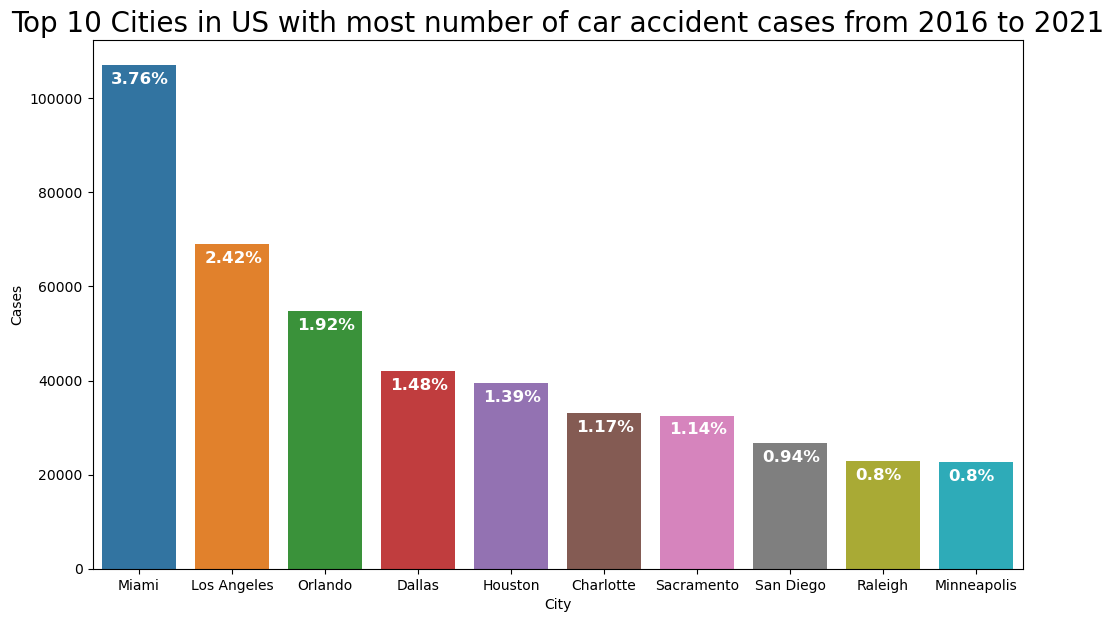

In [31]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})
top_10_cities = pd.DataFrame(city_df.head(10))
top_10_cities
fig, ax = plt.subplots(figsize = (12,7), dpi = 100)
ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'])
total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-4000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12, weight='bold',
                color='white')
plt.title("Top 10 Cities in US with most number of car accident cases from 2016 to 2021",size=20)

### The graph above shows the top 10 cities with most number of car accidents cases. It is found that Miama has the highest accidents' rate, while Los Angeles ranked 2nd. 
### Besides, San Diego was on the list with 0.94% accidents' rate. Be careful while driving on the road! Especially in these cities!

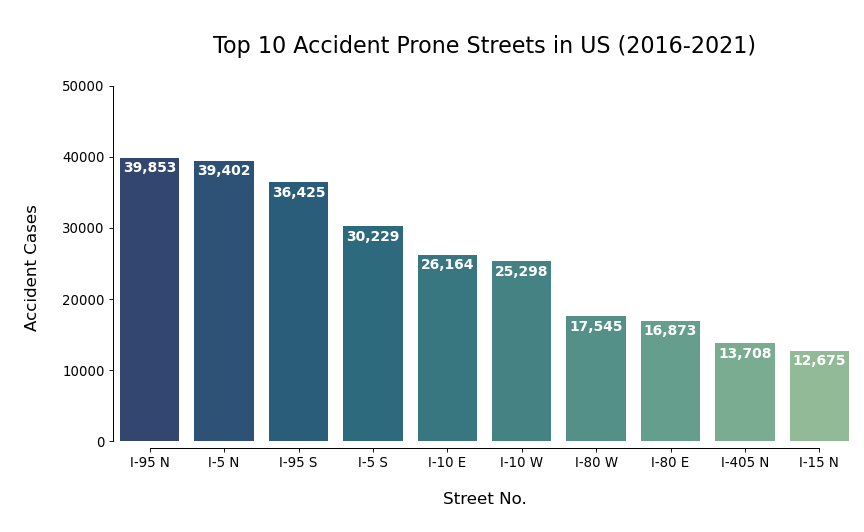

In [34]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})
top_ten_streets_df = pd.DataFrame(street_df.head(10))
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='crest_r')
ax1 = ax.twinx()


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 50000)
ax1.axes.set_ylim(-1000, 50000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20)

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15)
ax.set_ylabel('\nAccident Cases\n', fontsize=15)

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 50000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 50000)
ax.tick_params(axis='both', which='major', labelsize=12)

### The graph above shows 10 highways with the top 10 accidents numbers. It is found that  I-95 has highest accidents numbers from 2016-2021, while I-5 ranked 2nd.

### However, these two highways' length are over 1000 miles. As a result of this, the length might be the reason why there are so many accidents happening in these highways. So I decide to divide these cases numbers happening in these top 10 highway with their length next.

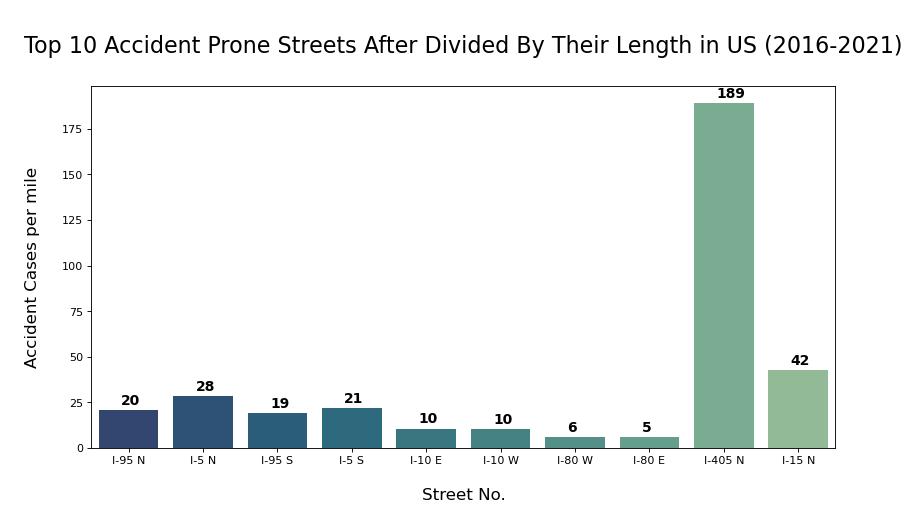

In [54]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
new_top_ten =[]
new_top_ten.append(top_ten_streets_df['Cases'][0]/1908) ## I-95 is 1908 miles
new_top_ten.append ( top_ten_streets_df['Cases'][1]/1381) ## I-5 is 1381 miles
new_top_ten.append (top_ten_streets_df['Cases'][2]/1908 )## I-95 is 1908 miles
new_top_ten.append ( top_ten_streets_df['Cases'][3]/1381 )## I-5 is 1381 miles
new_top_ten.append ( top_ten_streets_df['Cases'][4]/2460 )## I-10 is 2460 miles
new_top_ten.append ( top_ten_streets_df['Cases'][5]/2460) ## I-10 is 2460 miles
new_top_ten.append ( top_ten_streets_df['Cases'][6]/2901) ## I-80 is 2901 miles
new_top_ten.append ( top_ten_streets_df['Cases'][7]/2901 )## I-80 is 2901 miles
new_top_ten.append ( top_ten_streets_df['Cases'][8]/72.42 )## I-405 is 72.4 miles
new_top_ten.append ( top_ten_streets_df['Cases'][9]/295.4) ## I-405 is 295.4 miles

plt.title('\nTop 10 Accident Prone Streets After Divided By Their Length in US (2016-2021)\n', size=20)
ax=sns.barplot(y=new_top_ten, x=top_ten_streets_df['Street No.'], palette='crest_r')
ax.set_ylabel('\nAccident Cases per mile\n', fontsize=15)
ax.set_xlabel('\nStreet No.\n', fontsize=15)
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+3, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold', color = 'black')

### The graph above shows 10 highway accidents numbers after dividing by their road length. It is found that I-405 highway located in Los Angeles has the highest accidents numbers per mile. 
### Through searching, I found that I-405 is one highway with only 72.4 miles but there are 13708 car accidents happening in this highway from 2016-2021. The main possible reason might the crowded traffic in this highway. So be careful while driving in this highway when driving in Los Angeles!

# 2.2 Time Analysis 

In [36]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')
month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

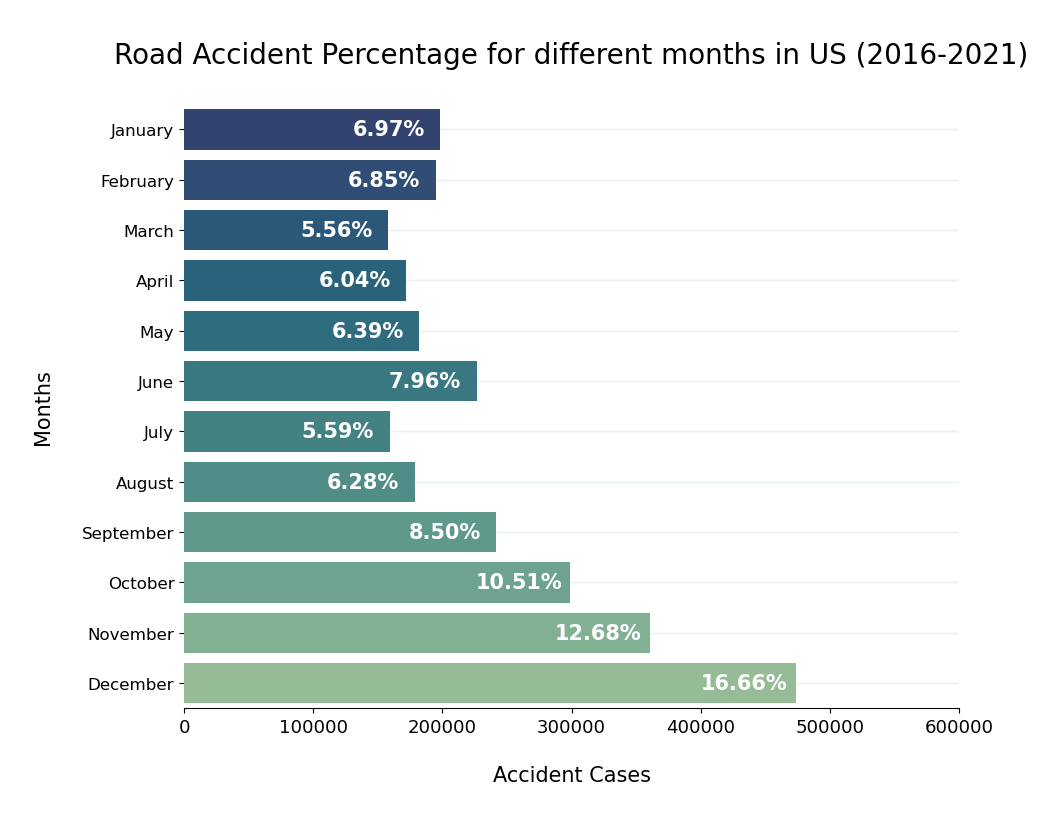

In [6]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 100)

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='crest_r')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-40000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='white', weight='bold')

plt.title('\nRoad Accident Percentage for different months in US (2016-2021)\n',size =20)
plt.xlabel('\nAccident Cases\n', fontsize=15)
plt.ylabel('\nMonths\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 600000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)


### The graph above shows the accidents distribution among all 12 months. It is shown that from October to December the accidents rate increases, which is to a large extent due to the weather conditions' change. 
### The snow and rain might be the main reason of traffic accidents increase at the end of year. Anyway, be more careful while dring at the end of the year!

In [44]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

Text(15, 20000, 'Evening Peak Hours')

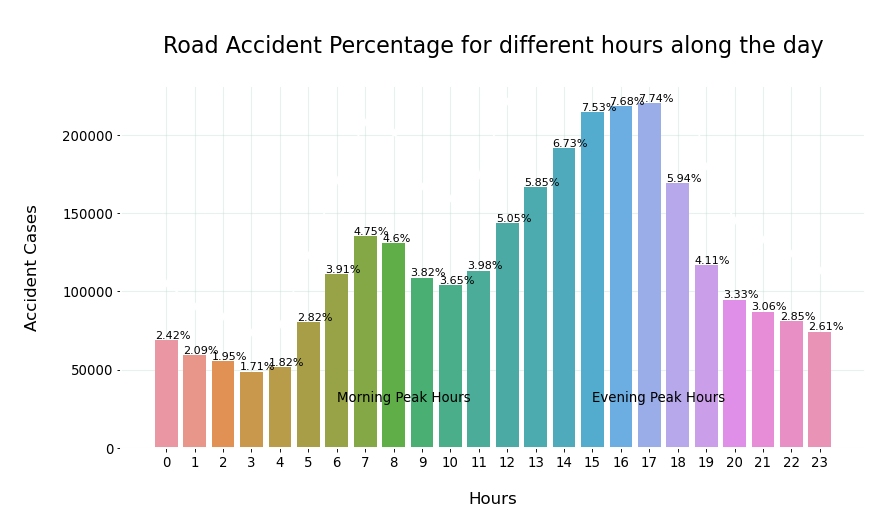

In [43]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'])
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage for different hours along the day\n', size=20)

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15)
ax.set_ylabel('\nAccident Cases\n', fontsize=15)

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.annotate('Morning Peak Hours',xy=(6,20000), fontsize=12)
plt.annotate('Evening Peak Hours',xy=(15,20000), fontsize=12)


### From the graph above, it is found that the accidents numbers has two maxima points separately at the morning peak hours and evening peak hours. As a result of this, it can be found that when the road is more crowded, the probabilty of car accident happening will become higher. 

Text(2.7, 600000, ']')

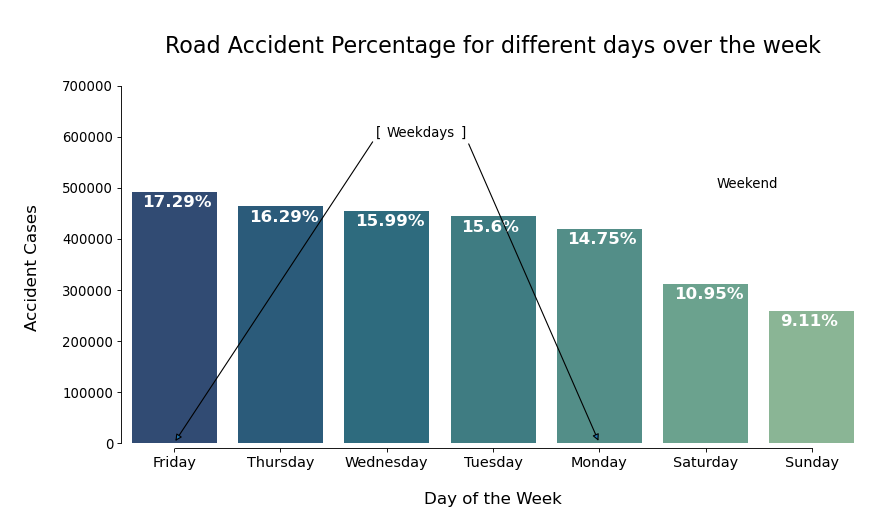

In [12]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette = "crest_r")

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-30000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(-10000, 700000)
plt.title('\nRoad Accident Percentage for different days over the week\n', size=20)
plt.ylabel('\nAccident Cases\n', fontsize=15)
plt.xlabel('\nDay of the Week\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 700000)
plt.annotate('Weekdays',xy=(2,600000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,500000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,600000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(4,0),xytext=(2.7,600000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

### From the weekdays analysis of accidents, it could be easily found that weekdays accidents' rate are higher that weekend. As a result of this, the more crowded, the more easily involved into a car accident. This is based on the data analysis!

# 2.3 Environment Data Analysis

In [13]:
weather = df.iloc[:, 19:28]
weather['Severity'] = df['Severity']
weather.head()

,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Severity
0,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,3
1,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,2
2,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,2
3,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,2
4,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,3


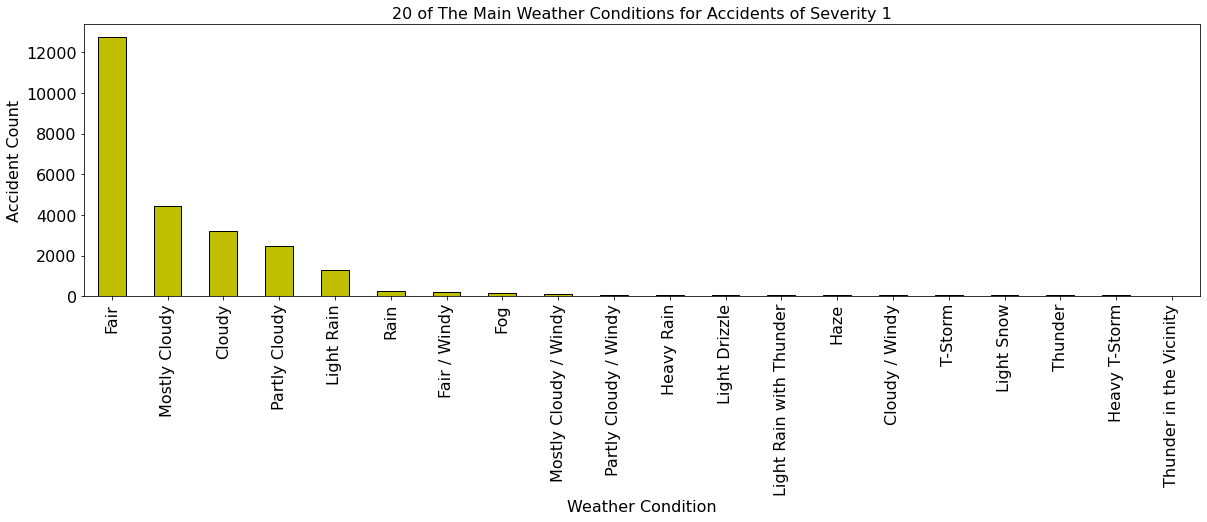

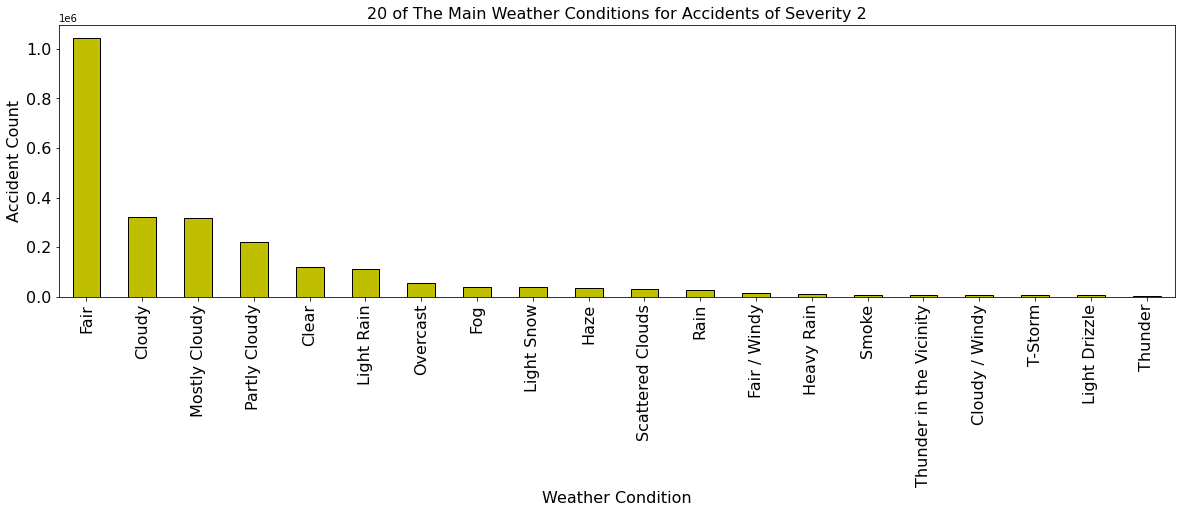

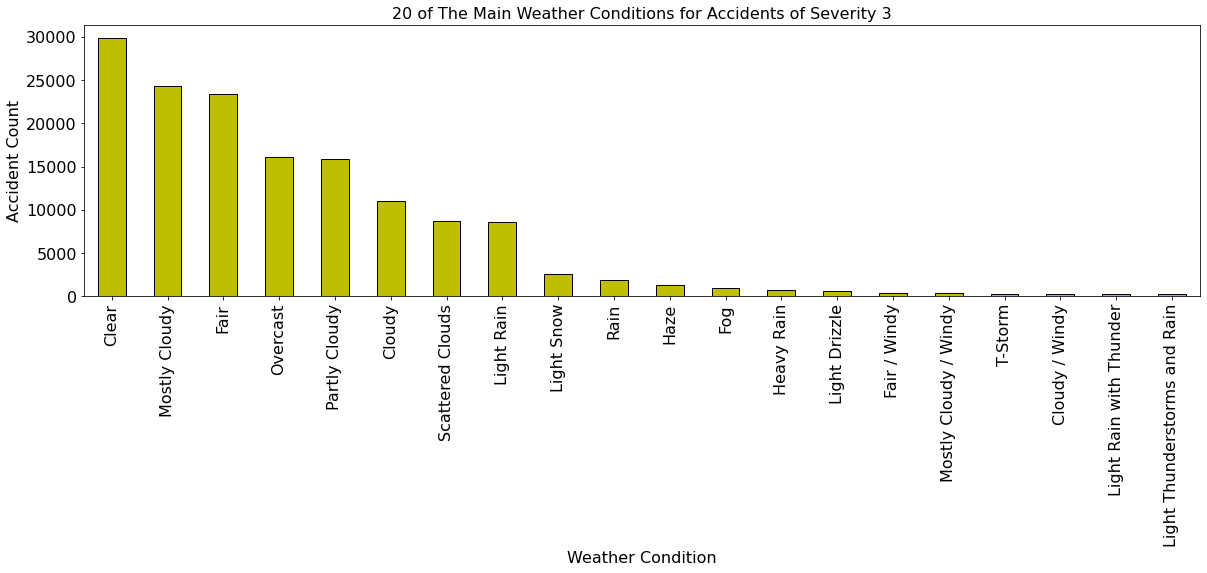

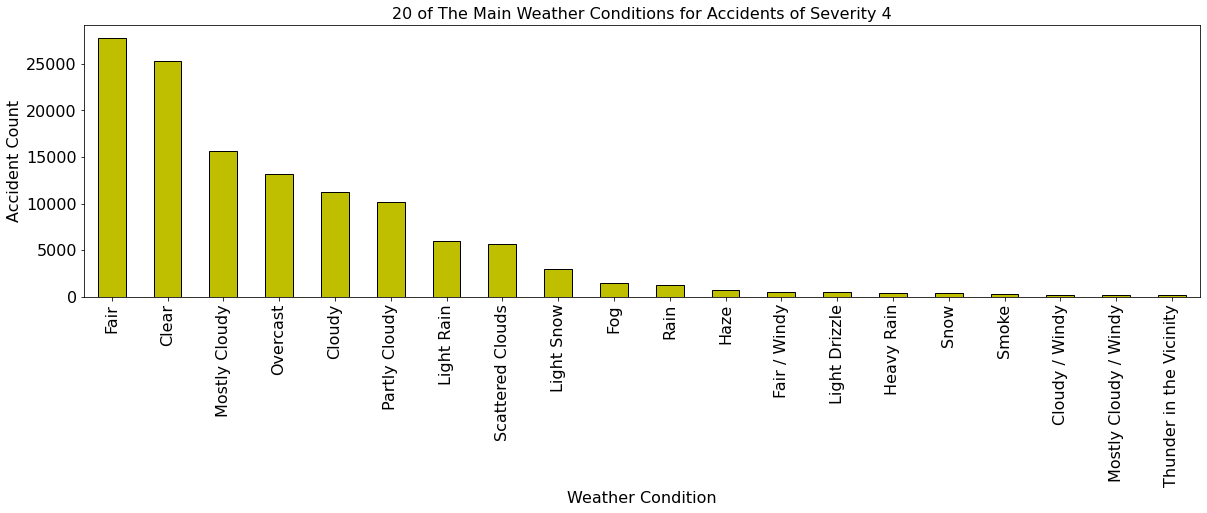

In [15]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

### The graphs shown above are the environment data's showing times in car accidents from severity 1 to severity 4. It is found that the fair and clear weather are the main weather conditions in all severity's accidents. 
### The reasons for this is possibly due to the fair and clear weather are the most frequent weather conditions. As a result of this, we should be careful while driving at anytime, no matter what the weather is!

In [16]:
# Drop ID column
df.drop(columns = ['ID'], inplace = True)
df.drop(columns = ['Description'], inplace = True)

In [17]:
#Data cleaning
df.isnull().sum()
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(2845342, 45)
(943318, 45)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               943318 non-null  int64         
 1   Start_Time             943318 non-null  datetime64[ns]
 2   End_Time               943318 non-null  datetime64[ns]
 3   Start_Lat              943318 non-null  float64       
 4   Start_Lng              943318 non-null  float64       
 5   End_Lat                943318 non-null  float64       
 6   End_Lng                943318 non-null  float64       
 7   Distance(mi)           943318 non-null  float64       
 8   Number                 943318 non-null  float64       
 9   Street                 943318 non-null  object        
 10  Side                   943318 non-null  object        
 11  City                   943318 non-null  object        
 12  County                 943318 non-null  ob

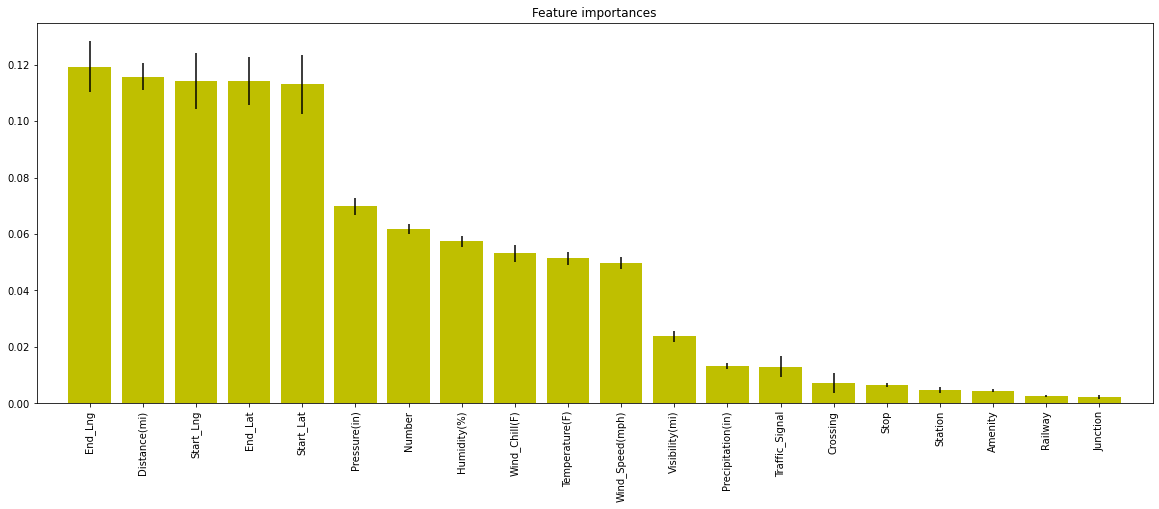

In [19]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns


for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

### The last graph shown here are the feature importances analysis of all the environment data. The feature importances refers to the techniques that calculate a score for all the input features in a given model. The score represent the "importance" of each feature. A higher score means that the specific feature will have a higher effect on the model that is being used to predict a certain variable.
### These variables' meaning are shown below:
Start_Time:Shows start time of the accident in local time zone.

End_Time:Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat:Shows latitude in GPS coordinate of the start point.

Start_Lng:Shows longitude in GPS coordinate of the start point.

End_Lat:Shows latitude in GPS coordinate of the end point.

End_Lng:Shows longitude in GPS coordinate of the end point.

Distance(mi):The length of the road extent affected by the accident.

Number: Shows the street number in address field.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Temperature(F):Shows the temperature (in Fahrenheit).

Wind_Chill(F):Shows the wind chill (in Fahrenheit).

Humidity(%):Shows the humidity (in percentage).

Pressure(in):Shows the air pressure (in inches).

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Precipitation(in): Shows precipitation amount in inches, if there is any.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

### From the graph, we could find that location is the most important feature in the accidents' prediction. In addition to this, the atmosphere pressure, the existence of street number, the temprature, wind speed and humidity all have 0.08 to 0.05 influence on accident prediction. 

# 3.Conclusion

This notebook shows a brief analysis of car accidents in US from 2016-2021 in three aspects: time, location and environment data. 

After comparing and analyzing, it is found that the location is the most important feature in predicting the happening of car accidents compared to all the other feature. In addition to this, the presence of street number, the wind spped, the humidity, temperature all have little effect on predicting happening of the car accidents.

Besides, the car accidents happening time shows a track that the car accidents happening rates will increasewhen the road is in busy and crowded time ( for example, morning peak hours and evening peak hours). 

Overall, while driving on the road, be especially careful to drive when the road is becoming more and more crowded. Be especially careful when you drive in Los Angeles at I-405N highway, the accidents are more prone to happen in that highway. Always remember: Safety is top priority in driving! 



# 4.Reference:
[1] N. Gilbert, “The Number of Cars in the US in 2022/2023: Market Share, Distribution, and Trends” 2022. [Online]. Available: https://financesonline.com/number-of-cars-in-the-us/

[2] Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

[3] Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

[4] Sobhan Moosavi. (2022). US Accidents (2016 - 2021) [Data set]. Kaggle. Availble: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents